**Задача (биномиальное распределение)**

Вероятность встретить рыжего котика 0,15. Найти закон распределения числа встреченных рыжих котиков , математическое ожидание и дисперсию, если встречено всего 10 котов.

In [10]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

n, p = 10, 0.15
X = np.arange(0,n+1)

binomial_dist = stats.binom(n,p)
probabilities = binomial_dist.pmf(X)

df = pd.DataFrame(data=probabilities.reshape(1,-1),
                  columns=X,index=['p'])
df

,0,1,2,3,4,5,6,7,8,9,10
p,0.196874,0.347425,0.275897,0.129834,0.040096,0.008491,0.001249,0.000126,0.000008,3.267686e-07,5.766504e-09


In [8]:
print(f'Мат. ожидание = {binomial_dist.mean():.4f}')
print(f'Дисперсия = {binomial_dist.var():.4f}')
print(f'Ст. отклонение = {binomial_dist.std():.4f}')

max_prob = probabilities.max()
mode = [x for x in X if round(probabilities[x],6)==round(max_prob,6)]
print(f'Мода = {mode}')

Мат. ожидание = 1.5000
Дисперсия = 1.2750
Ст. отклонение = 1.1292
Мода = [1]


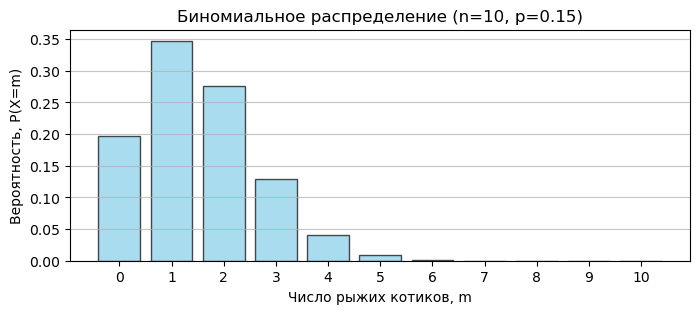

In [11]:
plt.figure(figsize=(8,3))
plt.bar(X,probabilities,color='skyblue',edgecolor='black',alpha=0.7)
plt.title(f'Биномиальное распределение (n={n}, p={p})')
plt.xlabel('Число рыжих котиков, m')
plt.ylabel('Вероятность, P(X=m)')
plt.xticks(X)
plt.grid(axis='y',alpha=0.75)
plt.show()

**Задача (Распределение Пуассона)**

Шанс получить питомца "Земельная Земля" при добычи блока земли в игре Terraria равен 0.000001 . Составить закон распределения для количетсва найденных питомцев при 1 000 000 выкапанных блоках

In [19]:
n = 1_000_000
p = 0.000001

lmb = n*p
print(lmb)

X = np.arange(0,10)

poisson_dist = stats.poisson(lmb)
probabilities = poisson_dist.pmf(X)

df = pd.DataFrame(data=probabilities.reshape(1,-1),
                  columns=X,index=['p'])
df

1.0


,0,1,2,3,4,5,6,7,8,9
p,0.367879,0.367879,0.18394,0.061313,0.015328,0.003066,0.000511,0.000073,0.000009,0.000001


**Задача (геометрическое распределение)**

Антон зашёл в тёмную комнату и пытается попасть по выключателю . Шанс попадания 0,05 . Антон продолжает попытки пока не попадёт. Найти

а) составить закон распределения числа сделанных выстрелов;

б) найти математическое ожидание и дисперсию этой случайной величины;

в) определить вероятность того, что для попадания потребуется не менее 5 попыток

In [21]:
p = 0.05

K = np.arange(1,11)
geom_dist = stats.geom(p)
probabilities = geom_dist.pmf(K)

df = pd.DataFrame(data=probabilities.reshape(1,-1),
                  columns=X,index=['p'])
df

,0,1,2,3,4,5,6,7,8,9
p,0.05,0.0475,0.045125,0.042869,0.040725,0.038689,0.036755,0.034917,0.033171,0.031512


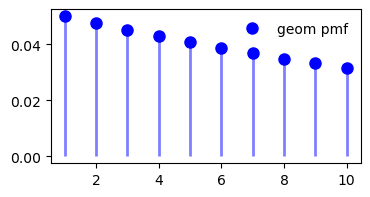

In [22]:
plt.figure(figsize=(4, 2))
plt.plot(K, probabilities,'bo',ms=8,label='geom pmf')
plt.vlines(K,0,probabilities,colors='b',lw=2,alpha=0.5)

plt.legend(loc='best',frameon=False)
plt.show();

In [23]:
print(f'Мат. ожидание = {geom_dist.mean():.4f}')
print(f'Дисперсия = {geom_dist.var():.4f}')

Мат. ожидание = 20.0000
Дисперсия = 380.0000


In [24]:
print(f'p(потребуется не менее 5 выстрелов) = {1 - probabilities[:4].sum():.4f}')


p(потребуется не менее 5 выстрелов) = 0.8145


**Задача гипергеометрическое распределение**
Среди 40 спортсменов 9 одарённых . Задания
а) составь закон распределения числа одарённых среди выбранных наудачу 5 спортсменов
б) найти мат ожидание и дисперсию это случайно велечины
в) определить вероятность что среди выбранных спортсменов нет одарённых

In [29]:
N, M, n = 40, 9, 5

X = np.arange(0, n + 1)
hypergeom_dist = hypergeom(M=N, n=n, N=M)
probabilities = hypergeom_dist.pmf(X)

df = pd.DataFrame(data=probabilities.reshape(1, -1),
                  columns=X,
                  index=['p'])
df

,0,1,2,3,4,5
p,0.25822,0.430367,0.245924,0.059361,0.005936,0.000191


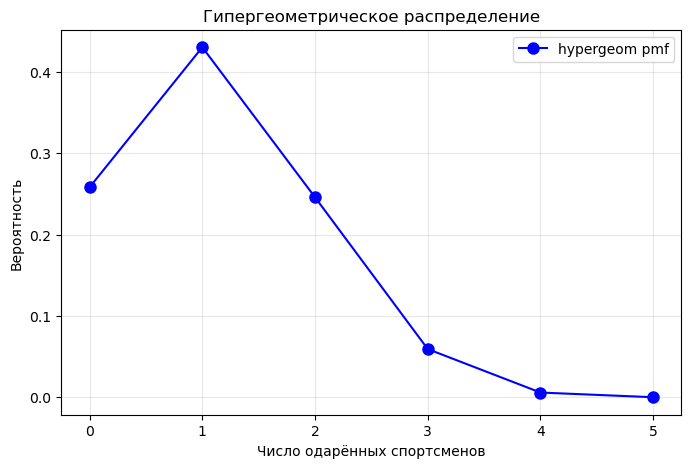

Мат. ожидание = 1.1250
Дисперсия = 0.7825
p(нет одарённых) = 0.2582


In [30]:

plt.figure(figsize=(8, 5))

plt.plot(X, probabilities, '-bo', ms=8, label='hypergeom pmf')
plt.xlabel('Число одарённых спортсменов')
plt.ylabel('Вероятность')
plt.title('Гипергеометрическое распределение')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


# Ячейка [3]: Математическое ожидание и дисперсия
print(f'Мат. ожидание = {hypergeom_dist.mean():.4f}')
print(f'Дисперсия = {hypergeom_dist.var():.4f}')

# Вывод:
# Мат. ожидание = 1.1250
# Дисперсия = 0.7825


# Ячейка [4]: Вероятность того, что нет одарённых
print(f'p(нет одарённых) = {hypergeom_dist.pmf(0):.4f}')

# Вывод:
# p(нет одарённых) = 0.2582
